## BP

In [1]:
# DataFrame
import numpy as np
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Collections
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
bp_sent_df = pd.read_csv('../AvgDailySent/bp_daily_avg_sent.csv')
bp_sent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  484 non-null    object 
 1   sentiment   480 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.7+ KB


In [3]:
bp_sent_df.head()

,created_at,sentiment
0,2021-01-01 00:00:00+00:00,0.800000
1,2021-01-02 00:00:00+00:00,1.000000
2,2021-01-03 00:00:00+00:00,1.000000
3,2021-01-04 00:00:00+00:00,1.333333
4,2021-01-05 00:00:00+00:00,1.125000


In [4]:
# Convert date column to datetime.
bp_sent_df['created_at'] = pd.to_datetime(bp_sent_df['created_at']).dt.tz_localize(None)
bp_sent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  484 non-null    datetime64[ns]
 1   sentiment   480 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.7 KB


In [5]:
# Assign target value.
bp_sent_df.loc[bp_sent_df['sentiment'] < 1.0, 'sentiment'] = 0.0
bp_sent_df.loc[bp_sent_df['sentiment'] > 1.0, 'sentiment'] = 2.0
bp_sent_df

,created_at,sentiment
0,2021-01-01,0.0
1,2021-01-02,1.0
2,2021-01-03,1.0
3,2021-01-04,2.0
4,2021-01-05,2.0
...,...,...
479,2022-04-25,1.0
480,2022-04-26,2.0
481,2022-04-27,1.0
482,2022-04-28,2.0


Text(0.5, 1.0, 'BP daily sentiment labels distribuition')

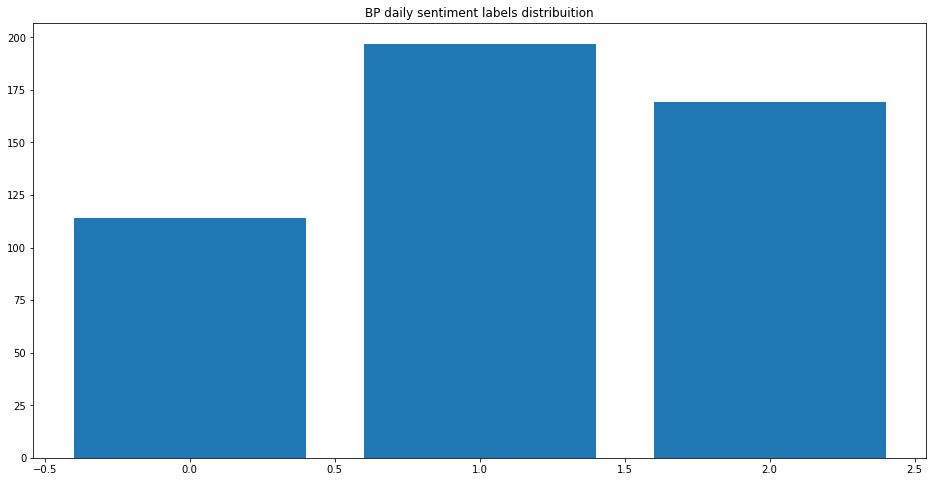

In [6]:
target_count = Counter(bp_sent_df.sentiment)

plt.figure(figsize=(16,8))
plt.bar(target_count.keys(), target_count.values())
plt.title("BP daily sentiment labels distribuition")

In [7]:
bp_sent_df['sentiment'].value_counts()    

1.0    197
2.0    169
0.0    114
Name: sentiment, dtype: int64

### Load stock data

In [10]:
bp_stock_df = pd.read_csv('../StockData/BP.L.csv')
bp_stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,257.350006,267.769989,252.800003,254.500000,233.756607,68541911.0
1,2021-01-05,255.699997,272.500000,255.550003,272.500000,250.289505,51679499.0
2,2021-01-06,280.000000,291.000000,275.700012,289.799988,266.179413,86834204.0
3,2021-01-07,293.250000,297.350006,249.750000,295.000000,270.955597,128597618.0
4,2021-01-08,296.750000,299.299988,293.089996,298.700012,274.354034,78224628.0


In [10]:
bp_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       335 non-null    object 
 1   Open       335 non-null    float64
 2   High       335 non-null    float64
 3   Low        335 non-null    float64
 4   Close      335 non-null    float64
 5   Adj Close  335 non-null    float64
 6   Volume     335 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 18.4+ KB


In [11]:
bp_stock_df = bp_stock_df.rename({'Date': 'created_at'}, axis=1)
bp_stock_df.head()

,created_at,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,257.350006,267.769989,252.800003,254.500000,233.756607,68541911.0
1,2021-01-05,255.699997,272.500000,255.550003,272.500000,250.289505,51679499.0
2,2021-01-06,280.000000,291.000000,275.700012,289.799988,266.179413,86834204.0
3,2021-01-07,293.250000,297.350006,249.750000,295.000000,270.955597,128597618.0
4,2021-01-08,296.750000,299.299988,293.089996,298.700012,274.354034,78224628.0


In [12]:
# Finetune the date such that sentiment for the previous day is assigned to the stock price of the current day.
bp_sent_df['created_at'] = bp_sent_df['created_at'] + pd.Timedelta(days=1)
bp_sent_df.head()

,created_at,sentiment
0,2021-01-02,0.0
1,2021-01-03,1.0
2,2021-01-04,1.0
3,2021-01-05,2.0
4,2021-01-06,2.0


In [13]:
# Convert date column to datetime.
bp_stock_df['created_at'] = pd.to_datetime(bp_stock_df['created_at']).dt.tz_localize(None)

In [14]:
merged = pd.merge(bp_stock_df, bp_sent_df, on='created_at')
merged.head()

,created_at,Open,High,Low,Close,Adj Close,Volume,sentiment
0,2021-01-04,257.350006,267.769989,252.800003,254.500000,233.756607,68541911.0,1.0
1,2021-01-05,255.699997,272.500000,255.550003,272.500000,250.289505,51679499.0,2.0
2,2021-01-06,280.000000,291.000000,275.700012,289.799988,266.179413,86834204.0,2.0
3,2021-01-07,293.250000,297.350006,249.750000,295.000000,270.955597,128597618.0,2.0
4,2021-01-08,296.750000,299.299988,293.089996,298.700012,274.354034,78224628.0,1.0


In [15]:
merged['sentiment'].value_counts()

1.0    133
2.0    121
0.0     78
Name: sentiment, dtype: int64

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

In [17]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(merged[['sentiment']])
merged['sentiment'] = imputer.transform(merged[['sentiment']])
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 334
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  335 non-null    datetime64[ns]
 1   Open        331 non-null    float64       
 2   High        331 non-null    float64       
 3   Low         331 non-null    float64       
 4   Close       331 non-null    float64       
 5   Adj Close   331 non-null    float64       
 6   Volume      331 non-null    float64       
 7   sentiment   335 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 23.6 KB


In [18]:
merged['sentiment'].value_counts()

1.0    136
2.0    121
0.0     78
Name: sentiment, dtype: int64

In [19]:
merged['trend'] = merged['Close'] - merged['Open']
merged.head()

,created_at,Open,High,Low,Close,Adj Close,Volume,sentiment,trend
0,2021-01-04,257.350006,267.769989,252.800003,254.500000,233.756607,68541911.0,1.0,-2.850006
1,2021-01-05,255.699997,272.500000,255.550003,272.500000,250.289505,51679499.0,2.0,16.800003
2,2021-01-06,280.000000,291.000000,275.700012,289.799988,266.179413,86834204.0,2.0,9.799988
3,2021-01-07,293.250000,297.350006,249.750000,295.000000,270.955597,128597618.0,2.0,1.750000
4,2021-01-08,296.750000,299.299988,293.089996,298.700012,274.354034,78224628.0,1.0,1.950012


In [20]:
merged.loc[merged['trend'] < 0, 'Trend'] = 'Negative'
merged.loc[merged['trend'] > 0, 'Trend'] = 'Positive'
merged.loc[merged['trend'] == 0, 'Trend'] = 'Neutral'
merged.head()

,created_at,Open,High,Low,Close,Adj Close,Volume,sentiment,trend,Trend
0,2021-01-04,257.350006,267.769989,252.800003,254.500000,233.756607,68541911.0,1.0,-2.850006,Negative
1,2021-01-05,255.699997,272.500000,255.550003,272.500000,250.289505,51679499.0,2.0,16.800003,Positive
2,2021-01-06,280.000000,291.000000,275.700012,289.799988,266.179413,86834204.0,2.0,9.799988,Positive
3,2021-01-07,293.250000,297.350006,249.750000,295.000000,270.955597,128597618.0,2.0,1.750000,Positive
4,2021-01-08,296.750000,299.299988,293.089996,298.700012,274.354034,78224628.0,1.0,1.950012,Positive


In [21]:
merged['Trend'].value_counts()

Positive    171
Negative    157
Neutral       3
Name: Trend, dtype: int64

In [22]:
merged.drop(['trend'], axis=1, inplace=True)
merged.rename({'Trend': 'trend'}, axis=1, inplace=True)
merged.head()

,created_at,Open,High,Low,Close,Adj Close,Volume,sentiment,trend
0,2021-01-04,257.350006,267.769989,252.800003,254.500000,233.756607,68541911.0,1.0,Negative
1,2021-01-05,255.699997,272.500000,255.550003,272.500000,250.289505,51679499.0,2.0,Positive
2,2021-01-06,280.000000,291.000000,275.700012,289.799988,266.179413,86834204.0,2.0,Positive
3,2021-01-07,293.250000,297.350006,249.750000,295.000000,270.955597,128597618.0,2.0,Positive
4,2021-01-08,296.750000,299.299988,293.089996,298.700012,274.354034,78224628.0,1.0,Positive


In [23]:
future_trend = merged['Close'].diff(periods=5)
merged['future_trend'] = future_trend
merged.head(10)

,created_at,Open,High,Low,Close,Adj Close,Volume,sentiment,trend,future_trend
0,2021-01-04,257.350006,267.769989,252.800003,254.500000,233.756607,68541911.0,1.0,Negative,NaN
1,2021-01-05,255.699997,272.500000,255.550003,272.500000,250.289505,51679499.0,2.0,Positive,NaN
2,2021-01-06,280.000000,291.000000,275.700012,289.799988,266.179413,86834204.0,2.0,Positive,NaN
3,2021-01-07,293.250000,297.350006,249.750000,295.000000,270.955597,128597618.0,2.0,Positive,NaN
4,2021-01-08,296.750000,299.299988,293.089996,298.700012,274.354034,78224628.0,1.0,Positive,NaN
5,2021-01-11,297.200012,299.649994,292.500000,298.799988,274.445862,37867052.0,2.0,Positive,44.299988
6,2021-01-12,301.950012,309.100006,299.250000,305.000000,280.140472,54675065.0,2.0,Positive,32.500000
7,2021-01-13,307.950012,311.950012,302.500000,303.899994,279.130157,51923962.0,1.0,Negative,14.100006
8,2021-01-14,303.250000,310.799988,302.649994,309.250000,284.044098,48245526.0,1.0,Positive,14.250000
9,2021-01-15,309.899994,311.149994,296.600006,302.450012,277.798401,44676583.0,1.0,Negative,3.750000


In [24]:
merged.loc[merged['future_trend'] < 0, 'Trend'] = 'Negative'
merged.loc[merged['future_trend'] > 0, 'Trend'] = 'Positive'
merged.loc[merged['future_trend'] == 0, 'Trend'] = 'Neutral'
merged.head(10)

,created_at,Open,High,Low,Close,Adj Close,Volume,sentiment,trend,future_trend,Trend
0,2021-01-04,257.350006,267.769989,252.800003,254.500000,233.756607,68541911.0,1.0,Negative,NaN,NaN
1,2021-01-05,255.699997,272.500000,255.550003,272.500000,250.289505,51679499.0,2.0,Positive,NaN,NaN
2,2021-01-06,280.000000,291.000000,275.700012,289.799988,266.179413,86834204.0,2.0,Positive,NaN,NaN
3,2021-01-07,293.250000,297.350006,249.750000,295.000000,270.955597,128597618.0,2.0,Positive,NaN,NaN
4,2021-01-08,296.750000,299.299988,293.089996,298.700012,274.354034,78224628.0,1.0,Positive,NaN,NaN
5,2021-01-11,297.200012,299.649994,292.500000,298.799988,274.445862,37867052.0,2.0,Positive,44.299988,Positive
6,2021-01-12,301.950012,309.100006,299.250000,305.000000,280.140472,54675065.0,2.0,Positive,32.500000,Positive
7,2021-01-13,307.950012,311.950012,302.500000,303.899994,279.130157,51923962.0,1.0,Negative,14.100006,Positive
8,2021-01-14,303.250000,310.799988,302.649994,309.250000,284.044098,48245526.0,1.0,Positive,14.250000,Positive
9,2021-01-15,309.899994,311.149994,296.600006,302.450012,277.798401,44676583.0,1.0,Negative,3.750000,Positive


In [25]:
merged.drop(['future_trend'], axis=1, inplace=True)
merged.rename({'Trend': 'future_trend'}, axis=1, inplace=True)

In [26]:
merged.head(10)

,created_at,Open,High,Low,Close,Adj Close,Volume,sentiment,trend,future_trend
0,2021-01-04,257.350006,267.769989,252.800003,254.500000,233.756607,68541911.0,1.0,Negative,NaN
1,2021-01-05,255.699997,272.500000,255.550003,272.500000,250.289505,51679499.0,2.0,Positive,NaN
2,2021-01-06,280.000000,291.000000,275.700012,289.799988,266.179413,86834204.0,2.0,Positive,NaN
3,2021-01-07,293.250000,297.350006,249.750000,295.000000,270.955597,128597618.0,2.0,Positive,NaN
4,2021-01-08,296.750000,299.299988,293.089996,298.700012,274.354034,78224628.0,1.0,Positive,NaN
5,2021-01-11,297.200012,299.649994,292.500000,298.799988,274.445862,37867052.0,2.0,Positive,Positive
6,2021-01-12,301.950012,309.100006,299.250000,305.000000,280.140472,54675065.0,2.0,Positive,Positive
7,2021-01-13,307.950012,311.950012,302.500000,303.899994,279.130157,51923962.0,1.0,Negative,Positive
8,2021-01-14,303.250000,310.799988,302.649994,309.250000,284.044098,48245526.0,1.0,Positive,Positive
9,2021-01-15,309.899994,311.149994,296.600006,302.450012,277.798401,44676583.0,1.0,Negative,Positive


### Moving Averages

In [27]:
sma_5 = merged['Close'].rolling(5).mean().shift()
ema_5 = merged['Close'].ewm(5).mean().shift()

In [28]:
merged['sma_5'] = sma_5
merged['ema_5'] = ema_5
merged.head(10)

,created_at,Open,High,Low,Close,Adj Close,Volume,sentiment,trend,future_trend,sma_5,ema_5
0,2021-01-04,257.350006,267.769989,252.800003,254.500000,233.756607,68541911.0,1.0,Negative,NaN,NaN,NaN
1,2021-01-05,255.699997,272.500000,255.550003,272.500000,250.289505,51679499.0,2.0,Positive,NaN,NaN,254.500000
2,2021-01-06,280.000000,291.000000,275.700012,289.799988,266.179413,86834204.0,2.0,Positive,NaN,NaN,264.318182
3,2021-01-07,293.250000,297.350006,249.750000,295.000000,270.955597,128597618.0,2.0,Positive,NaN,NaN,274.398896
4,2021-01-08,296.750000,299.299988,293.089996,298.700012,274.354034,78224628.0,1.0,Positive,NaN,NaN,281.030548
5,2021-01-11,297.200012,299.649994,292.500000,298.799988,274.445862,37867052.0,2.0,Positive,Positive,282.100000,285.954140
6,2021-01-12,301.950012,309.100006,299.250000,305.000000,280.140472,54675065.0,2.0,Positive,Positive,290.959998,289.173157
7,2021-01-13,307.950012,311.950012,302.500000,303.899994,279.130157,51923962.0,1.0,Negative,Positive,297.459998,292.832111
8,2021-01-14,303.250000,310.799988,302.649994,309.250000,284.044098,48245526.0,1.0,Positive,Positive,300.279999,295.235773
9,2021-01-15,309.899994,311.149994,296.600006,302.450012,277.798401,44676583.0,1.0,Negative,Positive,303.129999,298.132975


In [29]:
merged.dropna(inplace=True)
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 5 to 334
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   created_at    306 non-null    datetime64[ns]
 1   Open          306 non-null    float64       
 2   High          306 non-null    float64       
 3   Low           306 non-null    float64       
 4   Close         306 non-null    float64       
 5   Adj Close     306 non-null    float64       
 6   Volume        306 non-null    float64       
 7   sentiment     306 non-null    float64       
 8   trend         306 non-null    object        
 9   future_trend  306 non-null    object        
 10  sma_5         306 non-null    float64       
 11  ema_5         306 non-null    float64       
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 31.1+ KB


In [30]:
merged.set_index('created_at', inplace=True)
merged.head(10)

,Open,High,Low,Close,Adj Close,Volume,sentiment,trend,future_trend,sma_5,ema_5
created_at,,,,,,,,,,,
2021-01-11,297.200012,299.649994,292.500000,298.799988,274.445862,37867052.0,2.0,Positive,Positive,282.100000,285.954140
2021-01-12,301.950012,309.100006,299.250000,305.000000,280.140472,54675065.0,2.0,Positive,Positive,290.959998,289.173157
2021-01-13,307.950012,311.950012,302.500000,303.899994,279.130157,51923962.0,1.0,Negative,Positive,297.459998,292.832111
2021-01-14,303.250000,310.799988,302.649994,309.250000,284.044098,48245526.0,1.0,Positive,Positive,300.279999,295.235773
2021-01-15,309.899994,311.149994,296.600006,302.450012,277.798401,44676583.0,1.0,Negative,Positive,303.129999,298.132975
2021-01-18,298.200012,301.000000,295.500000,300.350006,275.869476,47700699.0,1.0,Positive,Positive,303.879999,298.991068
2021-01-19,302.149994,304.299988,299.299988,301.250000,276.696136,29146696.0,1.0,Negative,Negative,304.190002,299.252781
2021-01-20,300.649994,303.350006,299.170013,302.850006,278.165771,37313657.0,1.0,Positive,Negative,303.440002,299.627700
2021-01-21,302.549988,303.149994,292.549988,293.350006,269.440063,42797551.0,1.0,Negative,Negative,303.230005,300.220121


Text(0.5, 1.0, 'BP Closing Stock Price and Moving Averages')

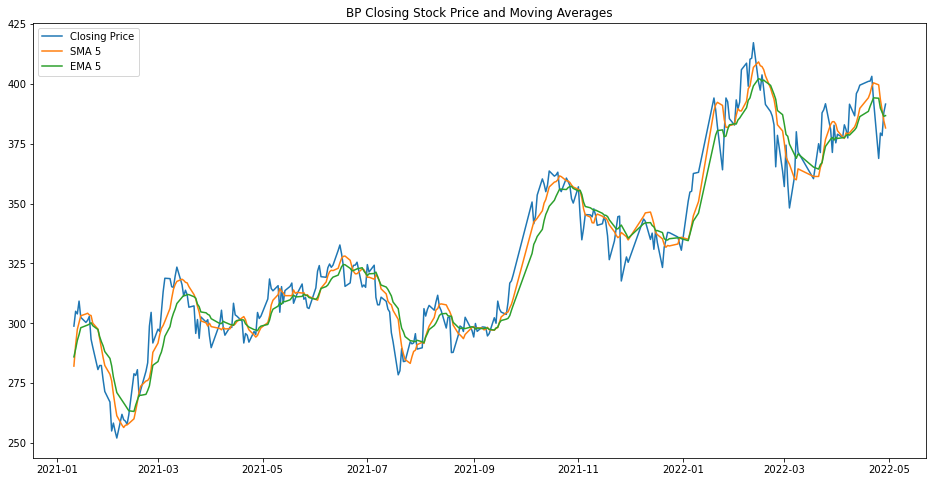

In [31]:
# Plot close price and moving averages.
plt.figure(figsize=(16,8))
plt.plot(merged['Close'], label='Closing Price')
plt.plot(merged['sma_5'], label='SMA 5')
plt.plot(merged['ema_5'], label='EMA 5')
plt.legend(loc='upper left')
plt.title('BP Closing Stock Price and Moving Averages')

In [32]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 306 entries, 2021-01-11 to 2022-04-29
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          306 non-null    float64
 1   High          306 non-null    float64
 2   Low           306 non-null    float64
 3   Close         306 non-null    float64
 4   Adj Close     306 non-null    float64
 5   Volume        306 non-null    float64
 6   sentiment     306 non-null    float64
 7   trend         306 non-null    object 
 8   future_trend  306 non-null    object 
 9   sma_5         306 non-null    float64
 10  ema_5         306 non-null    float64
dtypes: float64(9), object(2)
memory usage: 28.7+ KB


### Train - Test Split

In [34]:
test_size = 102
df_train = merged[:-test_size]
df_test = merged[-test_size:]
print('There are {} training samples and {} test samples.'.format(len(df_train), len(df_test)))

There are 204 training samples and 102 test samples.


In [35]:
def get_dummies(train_set, test_set, old_col_name):
    """Given a trainset, a testset, and the name of a column holding a 
    categorical variable, fit an encoder on the trainset, and use the 
    encoder to add dummy columns into the trainset and testset
    """
    
    one_hot_encoder = OneHotEncoder(drop="if_binary", sparse=False)
    
    cat_vals = train_set[old_col_name].values.reshape(-1,1)
    transformed = one_hot_encoder.fit_transform(cat_vals)
    
    new_col_names = one_hot_encoder.categories_[0].tolist()[1:]
    # Trainset 
    for i, new_col_name in enumerate(new_col_names):
        train_set[new_col_name] = transformed[:,i]
    
    cat_vals = test_set[old_col_name].values.reshape(-1,1)
    transformed = one_hot_encoder.transform(cat_vals)
    # Testset
    for i, new_col_name in enumerate(new_col_names):
        test_set[new_col_name] = transformed[:,i]
    
    return train_set, test_set

df_train, df_test = get_dummies(df_train, df_test, 'trend')

# check if the dummies are produced correctly in the trainset
df_train.head()

,Open,High,Low,Close,Adj Close,Volume,sentiment,trend,future_trend,sma_5,ema_5,Neutral,Positive
created_at,,,,,,,,,,,,,
2021-01-11,297.200012,299.649994,292.500000,298.799988,274.445862,37867052.0,2.0,Positive,Positive,282.100000,285.954140,0.0,0.0
2021-01-12,301.950012,309.100006,299.250000,305.000000,280.140472,54675065.0,2.0,Positive,Positive,290.959998,289.173157,0.0,0.0
2021-01-13,307.950012,311.950012,302.500000,303.899994,279.130157,51923962.0,1.0,Negative,Positive,297.459998,292.832111,1.0,0.0
2021-01-14,303.250000,310.799988,302.649994,309.250000,284.044098,48245526.0,1.0,Positive,Positive,300.279999,295.235773,0.0,0.0
2021-01-15,309.899994,311.149994,296.600006,302.450012,277.798401,44676583.0,1.0,Negative,Positive,303.129999,298.132975,1.0,0.0


In [36]:
df_test.head()

,Open,High,Low,Close,Adj Close,Volume,sentiment,trend,future_trend,sma_5,ema_5,Neutral,Positive
created_at,,,,,,,,,,,,,
2021-11-08,345.649994,350.649994,344.250000,345.250000,329.393921,36700886.0,1.0,Negative,Negative,344.340002,348.217616,1.0,0.0
2021-11-09,344.600006,348.250000,341.799988,344.450012,328.630646,33226420.0,2.0,Negative,Negative,341.990002,347.722666,1.0,0.0
2021-11-10,346.000000,353.420990,345.350006,347.799988,331.826813,77184530.0,2.0,Positive,Positive,341.890002,347.176904,0.0,0.0
2021-11-11,342.600006,347.299988,339.799988,345.149994,333.231079,54009703.0,2.0,Positive,Positive,344.479999,347.280802,0.0,0.0
2021-11-12,342.600006,344.200012,340.250000,340.899994,329.127838,72994977.0,2.0,Negative,Negative,345.609998,346.925523,1.0,0.0


In [37]:
df_train.drop(['trend'], axis=1, inplace=True)
df_test.drop(['trend'], axis=1, inplace=True)

In [38]:
df_train.rename({'Positive': 'encoded_trend'}, axis=1, inplace=True)
df_test.rename({'Positive': 'encoded_trend'}, axis=1, inplace=True)

### Training set scaling

In [39]:
scaler = StandardScaler()

trainset_target = df_train["future_trend"].values
trainset_predictors = df_train.drop("future_trend", axis=1)
scaled_vals = scaler.fit_transform(trainset_predictors)
df_train = pd.DataFrame(scaled_vals, columns=trainset_predictors.columns)

# Put non-scaled target variable back into the dataframe
df_train['future_trend'] = trainset_target

# inspect the data
df_train.head()

,Open,High,Low,Close,Adj Close,Volume,sentiment,sma_5,ema_5,Neutral,encoded_trend,future_trend
0,-0.459095,-0.545977,-0.480705,-0.386779,-0.615232,-0.623399,1.195274,-1.124028,-1.005557,-1.009852,-0.099504,Positive
1,-0.251166,-0.132405,-0.187671,-0.115085,-0.375966,0.171765,1.195274,-0.727342,-0.847753,-1.009852,-0.099504,Positive
2,0.011480,-0.007677,-0.046581,-0.163289,-0.418415,0.041614,-0.166938,-0.436319,-0.668383,0.990244,-0.099504,Positive
3,-0.194260,-0.058007,-0.040070,0.071156,-0.211950,-0.132407,-0.166938,-0.310060,-0.550549,-1.009852,-0.099504,Positive
4,0.096840,-0.042689,-0.302714,-0.226829,-0.474371,-0.301249,-0.166938,-0.182458,-0.408522,0.990244,-0.099504,Positive


### Testing set scaling

In [40]:
testset_target = df_test["future_trend"].values
testset_predictors = df_test.drop("future_trend", axis=1)

# fit_transform returns a NumPy array, so we need to put it back 
# into a Pandas dataframe
scaled_vals = scaler.transform(testset_predictors)
df_test = pd.DataFrame(scaled_vals, columns=testset_predictors.columns)

# Put non-scaled target variable back into the dataframe
df_test['future_trend'] = testset_target

# inspect the data
df_test.head()

,Open,High,Low,Close,Adj Close,Volume,sentiment,sma_5,ema_5,Neutral,encoded_trend,future_trend
0,1.661776,1.685996,1.765883,1.648730,1.693479,-0.678568,-0.166938,1.662626,2.046744,0.990244,-0.099504,Negative
1,1.615814,1.580962,1.659522,1.613673,1.661409,-0.842940,1.195274,1.557410,2.022481,0.990244,-0.099504,Negative
2,1.677098,1.807267,1.813637,1.760474,1.795700,1.236657,1.195274,1.552933,1.995726,-1.009852,-0.099504,Positive
3,1.528265,1.539386,1.572697,1.644348,1.854702,0.140288,1.195274,1.668894,2.000820,-1.009852,-0.099504,Positive
4,1.528265,1.403718,1.592233,1.458106,1.682299,1.038455,1.195274,1.719487,1.983403,0.990244,-0.099504,Negative


In [41]:
X_train = df_train.drop('future_trend', axis=1)
y_train = df_train['future_trend'].copy()

### Baseline

In [42]:
y_train.value_counts()

Positive    109
Negative     95
Name: future_trend, dtype: int64

The baseline classifier will output "Negative" for all predictions. We will use macro-averaging in this project (precision, recall and F-score are evaluated in each class separately and then averaged across classes).

So if we apply the baseline classifier to all of the training set. 

For the "Negative" label, the accuracy measures will be:

* Precision: 117/220 = 0.534

* Recall: 117/117 = 1.0

* F-score: 2/(1/precision + 1/recall) = 0.696

For the "Positive" label, it will be:

* Precision: 0.0/0.0 = 0.0

* Recall: 0.0/103 = 0.0

* F-score: 0.0

The averages of the two classes, i.e. the eventual baseline scores:

* **Precision: 0.266**

* **Recall: 0.5**

* **F-score: 0.348**

### Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
import time

rf = RandomForestClassifier(random_state=7)

# specify the hyperparameters and their values
# 4 x 3 x 2 = 24 combinations in the grid
param_grid = {
    'n_estimators': [10, 100, 200, 1000],
    'max_depth': [3, 5, 15],
    'min_samples_split': [5, 10]
}

# we'll use 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=10,
                           scoring='accuracy', 
                           return_train_score=True) 

start = time.time()
grid_search.fit(X_train, y_train)
end = time.time() - start
print(f"Took {end} seconds")

Took 117.27251100540161 seconds


In [44]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_split=5, random_state=7)

In [45]:
grid_search.best_score_

0.6323809523809524

In [46]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
17,"{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}",1.000000,0.632381,36.761905
4,"{'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}",0.858372,0.628333,26.799409
21,"{'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 100}",0.984771,0.627857,36.243318
18,"{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 200}",1.000000,0.627619,37.238095
19,"{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 1000}",1.000000,0.622619,37.738095
22,"{'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 200}",0.982591,0.617857,37.119593
9,"{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}",0.975493,0.617857,36.662062
8,"{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 10}",0.934103,0.617143,33.931999
5,"{'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}",0.899198,0.613571,31.764603
13,"{'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}",0.960255,0.613095,36.152860


In [47]:
feature_importances = grid_search.best_estimator_.feature_importances_

for k, v in sorted(zip(feature_importances, X_train.columns), reverse=True):
    print(f"{v}: {k}")

ema_5: 0.2146660921847547
sma_5: 0.1490517856930352
Close: 0.12211463857321327
Low: 0.11312818548778543
Adj Close: 0.10152969510388996
High: 0.09731425038752783
Volume: 0.09633388364124684
Open: 0.08237476944466213
sentiment: 0.014628924693771967
Neutral: 0.008673798174654475
encoded_trend: 0.0001839766154580689


In [48]:
import os
from joblib import dump

# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    
dump(grid_search.best_estimator_, 'models/bp-rf-clf.joblib')

['models/bp-rf-clf.joblib']

In [49]:
from sklearn.svm import SVC

svm = SVC(random_state=7, kernel='rbf')

# specify the hyperparameters and their values
# 5 x 3 = 15 combinations in the grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ["scale", "auto", 0.1],
}

# we'll use 10-fold cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=10,
                           scoring='accuracy', 
                           return_train_score=True) 

start = time.time()
grid_search.fit(X_train, y_train)
end = time.time() - start
print(f"Took {end} seconds")

Took 2.044095993041992 seconds


In [50]:
grid_search.best_score_

0.7390476190476191

In [51]:
grid_search.best_estimator_

SVC(C=10, random_state=7)

In [52]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
9,"{'C': 10, 'gamma': 'scale'}",0.924290,0.739048,20.041605
11,"{'C': 10, 'gamma': 0.1}",0.928647,0.738810,20.442368
10,"{'C': 10, 'gamma': 'auto'}",0.922110,0.734048,20.394819
14,"{'C': 100, 'gamma': 0.1}",0.968407,0.733571,24.249676
13,"{'C': 100, 'gamma': 'auto'}",0.966774,0.728810,24.614249
6,"{'C': 1, 'gamma': 'scale'}",0.863287,0.725000,16.018659
8,"{'C': 1, 'gamma': 0.1}",0.864920,0.720238,16.727818
7,"{'C': 1, 'gamma': 'auto'}",0.863281,0.720000,16.597267
12,"{'C': 100, 'gamma': 'scale'}",0.967864,0.718810,25.732346
0,"{'C': 0.01, 'gamma': 'scale'}",0.534316,0.534524,-0.038828


In [53]:
# Save the model
if not os.path.exists("models"):
    os.makedirs("models")
    
dump(grid_search.best_estimator_, 'models/bp-svm-rbf-clf.joblib')

['models/bp-svm-rbf-clf.joblib']

In [54]:
from joblib import load
best_svm = load("models/bp-svm-rbf-clf.joblib")
best_rf = load("models/bp-rf-clf.joblib")

In [55]:
X_test = df_test.drop("future_trend", axis=1)
y_test = df_test["future_trend"].copy()

In [56]:
ypred = best_svm.predict(X_test)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(y_test, ypred, average="macro")
print("SVM:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

SVM:
Precision: 0.4959568733153639
Recall: 0.5067096081588836
F score: 0.5010657484833579


In [58]:
accuracy_score(y_test, ypred)

0.7450980392156863

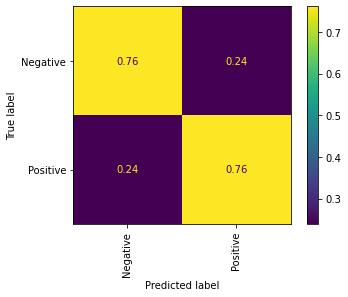

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, ypred, labels=best_svm.classes_, 
                                        xticks_rotation="vertical", normalize="true")

In [60]:
rf_ypred = best_rf.predict(X_test)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(y_test, rf_ypred, average="macro")
print("Random Forest:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

Random Forest:
Precision: 0.4068195179306291
Recall: 0.38969404186795487
F score: 0.3485564304461943


In [61]:
accuracy_score(y_test, rf_ypred)

0.5490196078431373

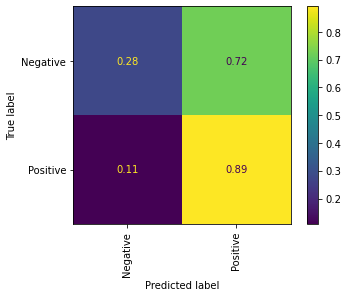

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, rf_ypred, labels=best_svm.classes_, 
                                        xticks_rotation="vertical", normalize="true")

### TSA

In [63]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm

In [64]:
def stationary_plot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

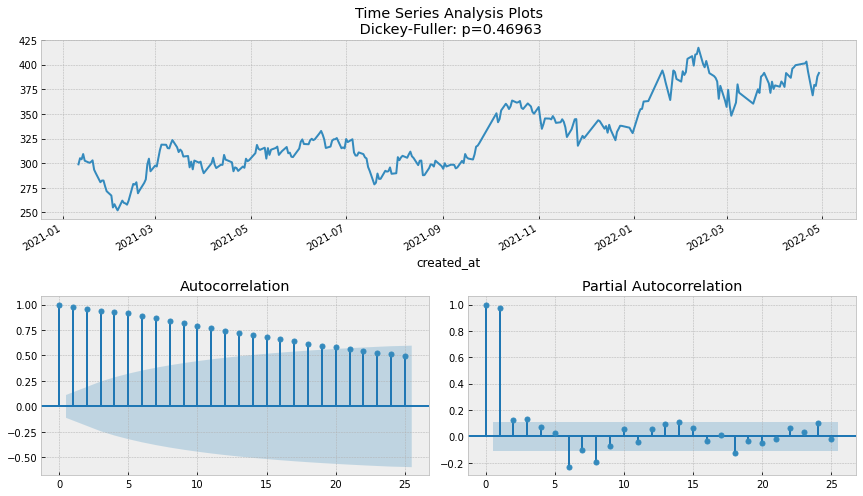

In [65]:
stationary_plot(merged["Close"])

### Testing without sentiment Variable.

In [66]:
stock_data_only = merged.drop(['sentiment'], axis=1)
stock_data_only.head()

,Open,High,Low,Close,Adj Close,Volume,trend,future_trend,sma_5,ema_5
created_at,,,,,,,,,,
2021-01-11,297.200012,299.649994,292.500000,298.799988,274.445862,37867052.0,Positive,Positive,282.100000,285.954140
2021-01-12,301.950012,309.100006,299.250000,305.000000,280.140472,54675065.0,Positive,Positive,290.959998,289.173157
2021-01-13,307.950012,311.950012,302.500000,303.899994,279.130157,51923962.0,Negative,Positive,297.459998,292.832111
2021-01-14,303.250000,310.799988,302.649994,309.250000,284.044098,48245526.0,Positive,Positive,300.279999,295.235773
2021-01-15,309.899994,311.149994,296.600006,302.450012,277.798401,44676583.0,Negative,Positive,303.129999,298.132975


In [67]:
training_set = stock_data_only[:-test_size]
testing_set = stock_data_only[-test_size:]
print('There are {} training samples and {} test samples.'.format(len(df_train), len(df_test)))

There are 204 training samples and 102 test samples.


In [102]:
training_set.head()

,Open,High,Low,Close,Adj Close,Volume,trend,future_trend,sma_5,ema_5
created_at,,,,,,,,,,
2021-01-11,411.000000,414.200012,404.600006,408.200012,375.869995,16564968,Negative,Positive,400.779999,404.266983
2021-01-12,410.049988,414.700012,410.049988,412.799988,380.105682,14890862,Positive,Positive,406.350000,405.252554
2021-01-13,404.299988,406.549988,401.549988,403.149994,371.219971,19141900,Negative,Negative,413.189996,406.997419
2021-01-14,404.549988,410.200012,404.049988,408.200012,375.869995,30898467,Positive,Negative,410.589996,406.161857
2021-01-15,406.049988,409.799988,400.000000,403.250000,371.312073,19699147,Negative,Negative,408.820001,406.583210


In [68]:
train_set, test_set = get_dummies(training_set, testing_set, 'trend')
train_set.head()

,Open,High,Low,Close,Adj Close,Volume,trend,future_trend,sma_5,ema_5,Neutral,Positive
created_at,,,,,,,,,,,,
2021-01-11,297.200012,299.649994,292.500000,298.799988,274.445862,37867052.0,Positive,Positive,282.100000,285.954140,0.0,0.0
2021-01-12,301.950012,309.100006,299.250000,305.000000,280.140472,54675065.0,Positive,Positive,290.959998,289.173157,0.0,0.0
2021-01-13,307.950012,311.950012,302.500000,303.899994,279.130157,51923962.0,Negative,Positive,297.459998,292.832111,1.0,0.0
2021-01-14,303.250000,310.799988,302.649994,309.250000,284.044098,48245526.0,Positive,Positive,300.279999,295.235773,0.0,0.0
2021-01-15,309.899994,311.149994,296.600006,302.450012,277.798401,44676583.0,Negative,Positive,303.129999,298.132975,1.0,0.0


In [104]:
train_set.head()

,Open,High,Low,Close,Adj Close,Volume,trend,future_trend,sma_5,ema_5
created_at,,,,,,,,,,
2021-01-11,411.000000,414.200012,404.600006,408.200012,375.869995,16564968,Negative,Positive,400.779999,404.266983
2021-01-12,410.049988,414.700012,410.049988,412.799988,380.105682,14890862,Positive,Positive,406.350000,405.252554
2021-01-13,404.299988,406.549988,401.549988,403.149994,371.219971,19141900,Negative,Negative,413.189996,406.997419
2021-01-14,404.549988,410.200012,404.049988,408.200012,375.869995,30898467,Positive,Negative,410.589996,406.161857
2021-01-15,406.049988,409.799988,400.000000,403.250000,371.312073,19699147,Negative,Negative,408.820001,406.583210


In [70]:
train_set.drop(['trend'], axis=1, inplace=True)
test_set.drop(['trend'], axis=1, inplace=True)

In [71]:
train_set.head()

,Open,High,Low,Close,Adj Close,Volume,future_trend,sma_5,ema_5,Neutral,Positive
created_at,,,,,,,,,,,
2021-01-11,297.200012,299.649994,292.500000,298.799988,274.445862,37867052.0,Positive,282.100000,285.954140,0.0,0.0
2021-01-12,301.950012,309.100006,299.250000,305.000000,280.140472,54675065.0,Positive,290.959998,289.173157,0.0,0.0
2021-01-13,307.950012,311.950012,302.500000,303.899994,279.130157,51923962.0,Positive,297.459998,292.832111,1.0,0.0
2021-01-14,303.250000,310.799988,302.649994,309.250000,284.044098,48245526.0,Positive,300.279999,295.235773,0.0,0.0
2021-01-15,309.899994,311.149994,296.600006,302.450012,277.798401,44676583.0,Positive,303.129999,298.132975,1.0,0.0


Feature Scaling

In [72]:
training_target = train_set["future_trend"].values
training_predictors = train_set.drop("future_trend", axis=1)
scaled_vals = scaler.fit_transform(training_predictors)
train_set = pd.DataFrame(scaled_vals, columns=training_predictors.columns)

# Put non-scaled target variable back into the dataframe
train_set['future_trend'] = trainset_target

# inspect the data
train_set.head()

,Open,High,Low,Close,Adj Close,Volume,sma_5,ema_5,Neutral,Positive,future_trend
0,-0.459095,-0.545977,-0.480705,-0.386779,-0.615232,-0.623399,-1.124028,-1.005557,-1.009852,-0.099504,Positive
1,-0.251166,-0.132405,-0.187671,-0.115085,-0.375966,0.171765,-0.727342,-0.847753,-1.009852,-0.099504,Positive
2,0.011480,-0.007677,-0.046581,-0.163289,-0.418415,0.041614,-0.436319,-0.668383,0.990244,-0.099504,Positive
3,-0.194260,-0.058007,-0.040070,0.071156,-0.211950,-0.132407,-0.310060,-0.550549,-1.009852,-0.099504,Positive
4,0.096840,-0.042689,-0.302714,-0.226829,-0.474371,-0.301249,-0.182458,-0.408522,0.990244,-0.099504,Positive


In [73]:
testing_target = test_set["future_trend"].values
testing_predictors = test_set.drop("future_trend", axis=1)
scaled_vals = scaler.fit_transform(testing_predictors)
test_set = pd.DataFrame(scaled_vals, columns=testing_predictors.columns)

# Put non-scaled target variable back into the dataframe
test_set['future_trend'] = testing_target

# inspect the data
test_set.head()

,Open,High,Low,Close,Adj Close,Volume,sma_5,ema_5,Neutral,Positive,future_trend
0,-0.883467,-0.904714,-0.772019,-0.922218,-1.099694,-0.796945,-1.007310,-0.894481,1.040016,-0.099504,Negative
1,-0.924273,-0.997254,-0.870370,-0.953512,-1.129426,-0.893306,-1.103650,-0.916604,1.040016,-0.099504,Negative
2,-0.869865,-0.797869,-0.727862,-0.822471,-1.004927,0.325830,-1.107750,-0.940998,-0.961524,-0.099504,Positive
3,-1.001999,-1.033885,-0.950656,-0.926130,-0.950226,-0.316902,-1.001570,-0.936354,-0.961524,-0.099504,Positive
4,-1.001999,-1.153416,-0.932591,-1.092377,-1.110059,0.209637,-0.955245,-0.952234,1.040016,-0.099504,Negative


In [74]:
Xtrain = train_set.drop('future_trend', axis=1)
ytrain = train_set['future_trend'].copy()

#### Random Forest Classifier

In [75]:
rf = RandomForestClassifier(random_state=7)

# specify the hyperparameters and their values
# 4 x 3 x 2 = 24 combinations in the grid
param_grid = {
    'n_estimators': [10, 100, 200, 1000],
    'max_depth': [3, 5, 15],
    'min_samples_split': [5, 10]
}

# we'll use 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=10,
                           scoring='accuracy', 
                           return_train_score=True) 

start = time.time()
grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")

Took 125.04825115203857 seconds


In [76]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=10,
                       random_state=7)

In [77]:
grid_search.best_score_

0.6866666666666668

In [78]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)
feature_importances = grid_search.best_estimator_.feature_importances_

In [79]:
for k, v in sorted(zip(feature_importances, Xtrain.columns), reverse=True):
    print(f"{v}: {k}")

ema_5: 0.18734333780320034
sma_5: 0.1793368533162345
Adj Close: 0.13455701925027613
High: 0.13359072166085495
Low: 0.11656969625704028
Volume: 0.08778660572550624
Close: 0.0829450894202301
Open: 0.07399951587027968
Neutral: 0.0038711606963777213
Positive: 0.0


In [80]:
# Save Models
if not os.path.exists("test_models"):
    os.makedirs("test_models")
    
dump(grid_search.best_estimator_, 'test_models/bp-rftest-clf.joblib')

['test_models/bp-rftest-clf.joblib']

#### Support Vector Classifier.

In [81]:
svc = SVC(random_state=7, kernel='rbf')

# specify the hyperparameters and their values
# 5 x 3 = 15 combinations in the grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ["scale", "auto", 0.1],
}

# we'll use 10-fold cross-validation
grid_search = GridSearchCV(svc, param_grid, cv=10,
                           scoring='accuracy', 
                           return_train_score=True) 

start = time.time()
grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")

Took 2.5382041931152344 seconds


In [82]:
grid_search.best_estimator_

SVC(C=10, random_state=7)

In [83]:
grid_search.best_score_

0.7390476190476192

In [84]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
9,"{'C': 10, 'gamma': 'scale'}",0.911229,0.739048,18.895504
10,"{'C': 10, 'gamma': 'auto'}",0.911229,0.739048,18.895504
11,"{'C': 10, 'gamma': 0.1}",0.911229,0.739048,18.895504
13,"{'C': 100, 'gamma': 'auto'}",0.939546,0.733571,21.922794
14,"{'C': 100, 'gamma': 0.1}",0.939546,0.733571,21.922794
12,"{'C': 100, 'gamma': 'scale'}",0.938459,0.719286,23.354614
6,"{'C': 1, 'gamma': 'scale'}",0.858384,0.705714,17.785696
7,"{'C': 1, 'gamma': 'auto'}",0.854574,0.705714,17.419127
8,"{'C': 1, 'gamma': 0.1}",0.854574,0.705714,17.419127
0,"{'C': 0.01, 'gamma': 'scale'}",0.534316,0.534524,-0.038828


In [85]:
# Save Model
if not os.path.exists("test_models"):
    os.makedirs("test_models")
    
dump(grid_search.best_estimator_, 'test_models/bp-svctest-rbf-clf.joblib')

['test_models/bp-svctest-rbf-clf.joblib']

### Testing the models.

In [86]:
best_svc_test = load("test_models/bp-svctest-rbf-clf.joblib")
best_rf_test = load("test_models/bp-rftest-clf.joblib")

In [87]:
Xtest = test_set.drop('future_trend', axis=1)
ytest = test_set['future_trend'].copy()

In [88]:
predicted = best_svc_test.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, predicted, average="macro")
print("SVM:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

SVM:
Precision: 0.5112580695953394
Recall: 0.4855072463768116
F score: 0.463366069319294


In [89]:
accuracy_score(ytest, predicted)

0.696078431372549

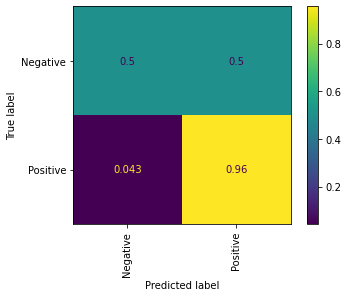

In [90]:
ConfusionMatrixDisplay.from_predictions(ytest, predicted, labels=best_svc_test.classes_, 
                                        xticks_rotation="vertical", normalize="true")

In [92]:
rf_predicted = best_rf_test.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, rf_predicted, average="macro")
print("Random Forest:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

Random Forest:
Precision: 0.4644723092998955
Recall: 0.4707461084272679
F score: 0.46206174777603354


In [93]:
accuracy_score(ytest, rf_predicted)

0.6862745098039216

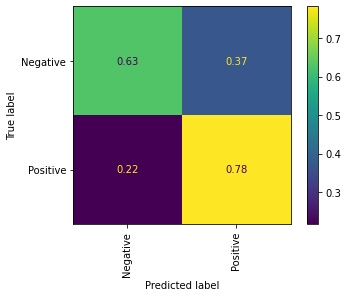

In [94]:
ConfusionMatrixDisplay.from_predictions(ytest, rf_predicted, labels=best_svc_test.classes_, 
                                        xticks_rotation="vertical", normalize="true")